# **0. Import Libraries**

In [1]:
import math
from tabulate import tabulate

# **1. Newton's Divided Difference Interpolation**

### 1.1. Obtaining Data

In [2]:
def get_inputs(filepath : str) -> tuple:
    """
    reads the data.csv file but if it doens't exist it Takes inputs from the user instead and returns data list

    Args:
        filepath(str)
    Returns:
        (x,y)(tuple): a nested tuple containing x and y
    Raises:
        Unmatched Error: Raises an Error
    """
    if filepath: # if there is a filepath provided
        try:
            with open(filepath, "r") as file:
                data = file.readlines()
                x,y = [], []
                for line in data:
                    x_i, y_i = map(float, line.strip().split(",")) # e.g. [1, 2.5]
                    x.append(x_i)
                    y.append(y_i)
        except FileNotFoundError:
            raise ValueError("File not found")
    else:
        x_str = input("Please enter x-values as comma separated numbers")
        x = list(map(float,x_str.split(',')))

        y_str = input("Please enter y-values as comma separated numbers")
        y = list(map(float,y_str.split(',')))

        assert len(x) == len(y), "[Error] x and y are not consistent"
            
    return (x,y)

In [3]:
x,y = get_inputs("data.csv")

In [4]:
def view_data(x : list, y : list) -> None:
  """
  Displays data

  Args:
      x(list): a list of x-values, length m
      y(list): a list of y-values, length m
  Returns:
      None
  Raises:
      Unmatched Length: Raises and Error
  """
  assert len(x) == len(y), "[Error] x and y are not consistent"

  tb_headers = ["x","y"] #Table Headers
  tb_data = [[x[i],y[i]] for i in range(len(x))] #Table data pairs list
  tb_format = "grid" #Table formatting

  tb = tabulate(tb_data,tb_headers,tb_format)

  print(tb)

In [5]:
view_data(x,y)

+-----+----------+
|   x |        y |
+=====+==========+
|   1 | 0        |
+-----+----------+
|   3 | 0.549306 |
+-----+----------+
|   4 | 0.693147 |
+-----+----------+
|   7 | 0.972955 |
+-----+----------+
|  14 | 1.31953  |
+-----+----------+
|  20 | 1.49787  |
+-----+----------+
|  21 | 1.52226  |
+-----+----------+
|  30 | 2        |
+-----+----------+


### 1.2. Netwon's Divided Difference Interpolation
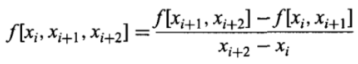
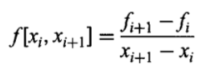

In [6]:
def dvd_diff(i : int, order : int, x : list, y : list) -> float:
  """
  Calculates the nth divided difference using recursion

  Args:
      ind(int): the subscript i of the divided difference
      order(int): The superscript of the divided difference, its order
      x(list): a list of x-values, length m
      y(list): a list of y-values, length m

  Returns:
      dvd_diff(float): the divided difference value

  Raises:
      Non-float y[ind]: Raises an Error
      Zero denominator: Raises an Error
  """
  if order == 0:
    assert type(y[i]) == float, "[Error] Base y must be float"

    return y[i]

  denominator = (x[i+order]-x[i]) #Denominator of the divided difference formula
  assert denominator != 0, "[Error] Repeated Data detected"

  return (dvd_diff(i+1,order-1,x,y)-dvd_diff(i,order-1,x,y))/denominator

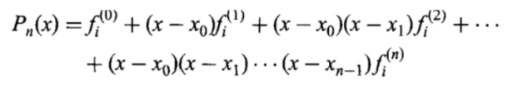

In [7]:
def newton_dvd_diff(x_inter : float, poly_order : int, x : list, y : list) -> float:
  """
  Interpolates using an nth order newton's divided difference polynomial

  Args:
      x_inter(float): x-value to interpolate at
      poly_order(int): the polynomial order
      x(list): a list of x-values, length m
      y(list): a list of y-values, length m

  Returns:
      newton divided differnce interpolation

  Raises:
      Non-float x_inter: Raises an Error
      Non-int poly_order: Raises an Error
      Non-positive poly_order: Raises an Error
      Non-float y[0]: Raises an Error
  """

  assert type(x_inter) == float, "[Error] X-value must be a float"
  assert type(poly_order) == int, "[Error] Polynomial order must be an integar"
  assert poly_order >= 0, "[Error] Polynomial order must be greater than zero"

  if poly_order == 0:
    assert type(y[0]) == float, "[Error] Base y must be float"

    return y[0]

  p_prev = newton_dvd_diff(x_inter, poly_order-1, x, y) # Previous interpolated polynomial values (order-1)

  dvd_order = dvd_diff(0,poly_order,x,y) # Divided Difference of nth order at index 0
  x_term = math.prod([(x_inter-x[i]) for i in range(poly_order)]) # Obtainig (x-x0)(x-x1)(x-x2).....(x-xth)

  return  p_prev+ x_term*dvd_order

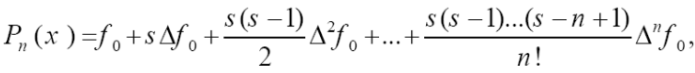

In [8]:
def newton_fwd_diff(x_inter : float, s : float, i : float, poly_order : int, x : list, y : list)->float:
    """
    Interpolates using an nth order newton's divided difference polynomial

    Args:
        x_inter(float): x-value to interpolate at
        s(float): s = (x-x0)/h
        i(float): index of the highest order divided difference
        poly_order(int): the polynomial order
        x(list): a list of x-values, length m
        y(list): a list of y-values, length m

    Returns:
        newton divided differnce interpolation

    Raises:
        Non-float x_inter: Raises an Error
        Non-int poly_order: Raises an Error
        Non-positive poly_order: Raises an Error
        Non-float y[i]: Raises an Error
    """
    assert type(x_inter) == float, "[Error] X-value must be a float"
    assert type(poly_order) == int, "[Error] Polynomial order must be an integar"
    assert poly_order >= 0, "[Error] Polynomial order must be greater than zero"
    if poly_order == 0:
        assert type(y[i]) == float, "[Error] Base y must be float"
        return y[i]
    p_prev = newton_fwd_diff(x_inter, s, i, poly_order-1, x, y)
    dvd_order = dvd_diff(i, poly_order, x, y)
    s_term = math.prod([(s-i)/(math.factorial(poly_order)) for i in range(poly_order)]) #Obtaining s(s-1)(s-2)(s-3)...(s-n+1)
    return p_prev+s_term*dvd_order


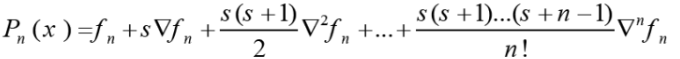

In [9]:
def newton_bwd_diff(x_inter : float, s : float, i : float, poly_order : int, x : list, y : list)->float:
    """
    Interpolates using an nth order newton's divided difference polynomial

    Args:
        x_inter(float): x-value to interpolate at
        s(float): s = (x-x0)/h
        i(float): index of the highest order divided difference
        poly_order(int): the polynomial order
        x(list): a list of x-values, length m
        y(list): a list of y-values, length m

    Returns:
        newton divided differnce interpolation

    Raises:
        Non-float x_inter: Raises an Error
        Non-int poly_order: Raises an Error
        Non-positive poly_order: Raises an Error
        Non-float y[i]: Raises an Error
    """
    assert type(x_inter) == float, "[Error] X-value must be a float"
    assert type(poly_order) == int, "[Error] Polynomial order must be an integar"
    assert poly_order >= 0, "[Error] Polynomial order must be greater than zero"
    if poly_order == 0:
        assert type(y[i]) == float, "[Error] Base y must be float"
        return y[i]
    p_prev = newton_bwd_diff(x_inter, s, i+1, poly_order-1, x, y) # since we are going backward we'd add 1 to the index each time we recurse
    dvd_order = dvd_diff(i, poly_order, x, y)
    s_term = math.prod([(s+i)/(math.factorial(poly_order)) for i in range(poly_order)]) #Obtaining s(s+1)(s+2)(s+3)...(s+n-1)
    return p_prev+s_term*dvd_order


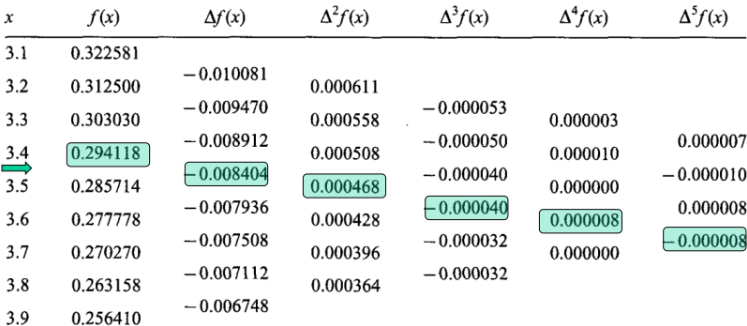

In [10]:
def has_enough_depth(i : int, order : int ,x : list) -> bool:
    """
    returns true if the order+1 is greater than the maximum depth that can be generated from the index : i

    e.g.
        in the upper photo the index(i) is 3 which referes to the index of 3.4
        we can calculate the max_depth using len(x)-i because the maximum depth would decrease by 1 each step you go down
        but there is a catch as once the index get past the middle index, the depth would start to increase again as we would use backward newton

        pattern:
            <forward>
            - depth for index 0 is len(x)-0     which is 8
            - depth for index 1 is len(x)-1     which is 7
            - depth for index 2 is len(x)-2     which is 6
            - depth for index 3 is len(x)-3     which is 5

            <backward>
            - depth for index 4 is len(x)-3     which is 5
            - depth for index 5 is len(x)-2     which is 6
            - depth for index 7 is len(x)-1     which is 7
            - depth for index 8 is len(x)-0     which is 8
        
    """
    if i < (len(x)/2):
        v = i
    else:
        v = len(x)-i-1

    max_depth = len(x)-v 
    print("Maximum Depth: ",max_depth)
    return max_depth >= order+1

In [11]:
def is_equally_spaced(x : list) -> bool:
    """
    returns true if x values are equally spaced

    Args:
        x(list): a list of x-values, length m
    """
    
    first_step = x[1]-x[0] # step between 1st and 2nd point

    for i in range(2,len(x)):
        if x[i] - x[i-1] != first_step: # making sure that each step has the same in x-values has the same step as first_step
            return False
    return True

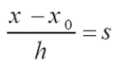

In [12]:
def get_interpolation(x : list, y : list):
    """
    Interpolates at the provided value of x_inter

    Args:
        x(list): a list of x-values, length m
        y(list): a list of y-values, length m

    Returns:
        y_inter(float): Interpolation result
    Raises:

    """

    x_inter = float(input("Please enter interpolation x number:")) # Interpolation x-value
    order = int(input("Please enter polynomial order (>0):")) # Interpolation Polynomial Order

    assert type(x_inter) == float, "[Error] X-value must be a float"
    assert type(order) == int, "[Error] Polynomial order must be an integar"
    assert order >= 0, "[Error] Polynomial order must be greater than zero"

    if is_equally_spaced(x): # use newton fwd/bwd if data is spaced equally
        distances = [abs(x[i] - x_inter) for i in range(len(x))]
        i = distances.index(min(distances)) # index of the point that is closest to the x_inter
        if has_enough_depth(i, order, x): 
            median = len(x)/2 # not exactly the median but logically it works
            step = x[0]-x[1]
            s = (x_inter-x[i])/step
            print("s: ", s)
            
            isBackward = i >= median # does backward only when the index get passed the median of the table
            if isBackward:
                print("Using Newton_Backward Divided Difference")
                # note that the backward would be (i-order) here because that's were the last divided difference polynomial would end up at
                return newton_bwd_diff(x_inter, s, i-order, order, x, y) # Newton backward divided Difference Interpolation Function
            else:
                print("Using Newton_Forward Divided Difference")
                return newton_fwd_diff(x_inter, s, i, order, x, y) # Newton forward divided Difference Interpolation Function
    
    assert order<len(x), "[Error] Limited Dataset for polynomial order"
    print("Using Newton_divided Difference")
    return newton_dvd_diff(x_inter,order,x,y) # Netwon divided Difference Interpolation Function

In [13]:
get_interpolation(x,y)

Using Newton_divided Difference


0.4504877031249999